In [ ]:
#!pip install xgboost

In [86]:
#!pip install streamlit scikit-learn

In [88]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

from scipy import stats
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


#algorithms packages and libraries
from sklearn.exceptions import ConvergenceWarning

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report 

In [22]:
warnings.filterwarnings('ignore')

In [23]:
csv_data = '/Users/sarbjitkaur/Documents/TH_Project/healthcare.csv'
actual_data = pd.read_csv(csv_data)

In [24]:
actual_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


EDA

In [25]:
actual_data.describe()

,PatientId,AppointmentID,Age,Date.diff
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,10.166721
std,2.558267e+14,7.133274e+04,22.466214,15.263508
min,3.921784e+04,5.030230e+06,1.000000,-6.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,4.000000
75%,9.433600e+13,5.725634e+06,56.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


In [26]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


Check null values

In [27]:
actual_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

In [28]:
actual_data.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

In [29]:
actual_data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41
106986,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [30]:
actual_data.shape

(106987, 15)

In [31]:
actual_data.size

1604805

In [32]:
data = actual_data.copy()

In [33]:
data.shape

(106987, 15)

 Data Types correction

In [34]:
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])

In [35]:
print(data.dtypes)

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                 bool
Hipertension                bool
Diabetes                    bool
Alcoholism                  bool
Handcap                     bool
SMS_received                bool
Showed_up                   bool
Date.diff                  int64
dtype: object


Spelling mistakes

In [36]:
print(list(data.columns))

['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up', 'Date.diff']


Renaming columns

In [37]:

data.rename(columns={"Hipertension": "Hypertension", "Handcap": "Handicap", "Date.diff": "DaysDifference", "Showed_up" : "No_Show"}, inplace=True)

print(data.columns)


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show',
       'DaysDifference'],
      dtype='object')


Statitical analysis

In [38]:
transposed_data = data.describe().T
transposed_data

,count,mean,min,25%,50%,75%,max,std
PatientId,106987.0,147281371616732.75,39217.84439,4173522744033.0,31724627165447.0,94335995568769.0,999981631772427.0,255826674206772.78125
AppointmentID,106987.0,5675434.199716,5030230.0,5640489.5,5680744.0,5725634.5,5790484.0,71332.741342
ScheduledDay,106987,2016-05-08 21:18:53.330217728,2015-11-10 00:00:00,2016-04-29 00:00:00,2016-05-10 00:00:00,2016-05-20 00:00:00,2016-06-08 00:00:00,NaN
AppointmentDay,106987,2016-05-19 01:18:58.041070336,2016-04-29 00:00:00,2016-05-09 00:00:00,2016-05-18 00:00:00,2016-05-31 00:00:00,2016-06-08 00:00:00,NaN
Age,106987.0,38.316085,1.0,19.0,38.0,56.0,115.0,22.466214
DaysDifference,106987.0,10.166721,-6.0,0.0,4.0,14.0,179.0,15.263508


We can see DaysDifference has -6 in min value, we need to rectify these records as it is inconsistent data 

In [39]:
negative_days = data[data['DaysDifference'] < 0]
negative_days['DaysDifference'].count()

5

from above data, it is clear that these five records have gotten wrong dates while entering data, to solve this we need to swap values in Appointment Day and Scheduled date as Appointment day should always be either greater or same as Scheduled day. 

In [40]:
wrong_records = data['AppointmentDay'] < data['ScheduledDay']
wrong_records

0         False
1         False
2         False
3         False
4         False
          ...  
106982    False
106983    False
106984    False
106985    False
106986    False
Length: 106987, dtype: bool

In [41]:
# Swap the problematic rows
temp_scheduleddate = data.loc[wrong_records, 'ScheduledDay']
data.loc[wrong_records, 'ScheduledDay'] = data.loc[wrong_records, 'AppointmentDay']
data.loc[wrong_records, 'AppointmentDay'] = temp_scheduleddate

In [42]:
# Recalculate DateDiff for swapped rows
data.loc[wrong_records, 'DaysDifference'] = (data.loc[wrong_records, 'AppointmentDay'] - 
                                       data.loc[wrong_records, 'ScheduledDay']).dt.days

Verifiy if the negative Days Difference has been corrected

In [43]:
negative_days = data[data['DaysDifference'] < 0]
negative_days

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,DaysDifference


In [44]:
data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,DaysDifference
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


Visualization

1. Gender vs No show - Grouped Bar chart

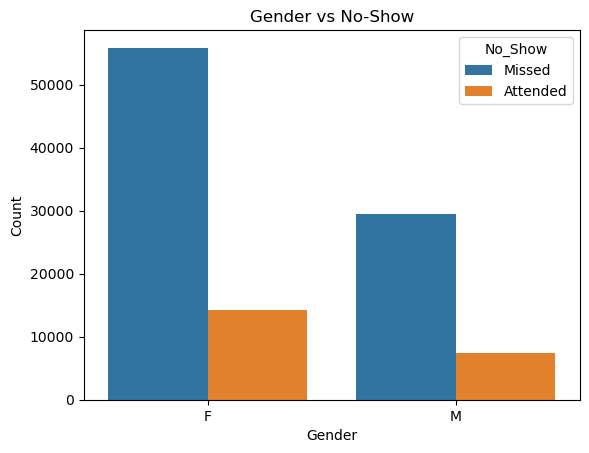

In [45]:

sns.countplot(data=data, x='Gender', hue='No_Show',hue_order=[True, False])
plt.title('Gender vs No-Show')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='No_Show', labels=['Missed', 'Attended'])
plt.show()

Above data reveals that both genders have a notably high rate of missed appointments, with the number of missed appointments significantly outnumbering the attended ones. This trend indicates a substantial gap in appointment adherence across both groups

2. Age Distribution vs No-Show (Histogram)

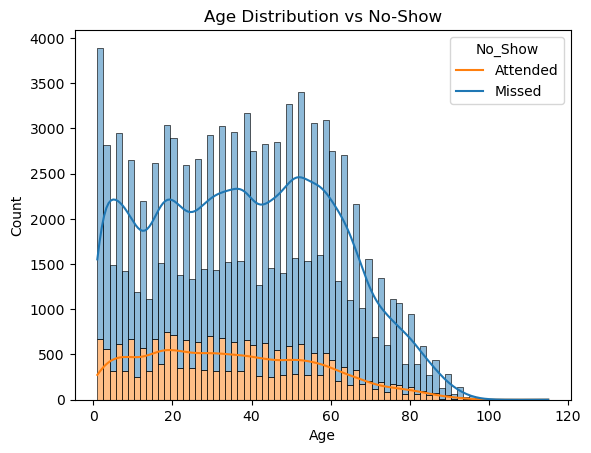

In [46]:
sns.histplot(data=data, x='Age', hue='No_Show', hue_order=[True, False],kde=True, multiple='stack')
plt.title('Age Distribution vs No-Show')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='No_Show', labels=['Attended', 'Missed'])
plt.show()


The age distribution shows that in all age groups up to 60, the majority of individuals missed their appointments, slight variations in every other age group. However, for individuals above 60, more patients attended their appointments than missed them.

3. SMS Received vs No-Show (Barchart)

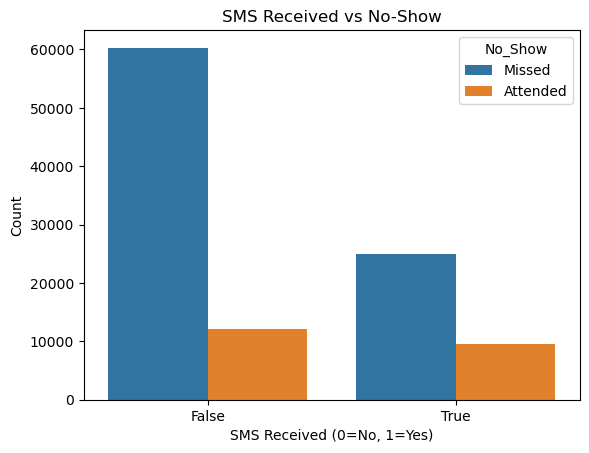

In [47]:
# Countplot for SMS Received vs No-Show
sns.countplot(data=data, x='SMS_received', hue='No_Show',hue_order=[True, False])
plt.title('SMS Received vs No-Show')
plt.xlabel('SMS Received (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='No_Show', labels=['Missed', 'Attended'])
plt.show()



It is evident that the number of patients who missed their appointments is significantly higher among those who did not receive an SMS reminder, compared to those who received the reminder.

In [48]:
df2 = data[data['DaysDifference'] > 45]

df2.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,DaysDifference
268,6.342844e+10,5430959,F,2016-03-04,2016-04-29,20,SANTA MARTHA,False,False,False,False,False,False,True,56
276,6.492948e+12,5464289,M,2016-03-14,2016-04-29,60,ANDORINHAS,False,True,True,False,False,True,True,46
449,9.639166e+11,5452612,M,2016-03-10,2016-04-29,20,SÃO PEDRO,False,False,False,False,False,True,False,50
450,4.414826e+13,5408325,F,2016-02-29,2016-04-29,32,NOVA PALESTINA,False,False,False,False,False,True,False,60
453,1.164255e+11,5466013,F,2016-03-14,2016-04-29,37,CONQUISTA,False,False,False,False,False,True,True,46


4. Date Diff Vs No Show

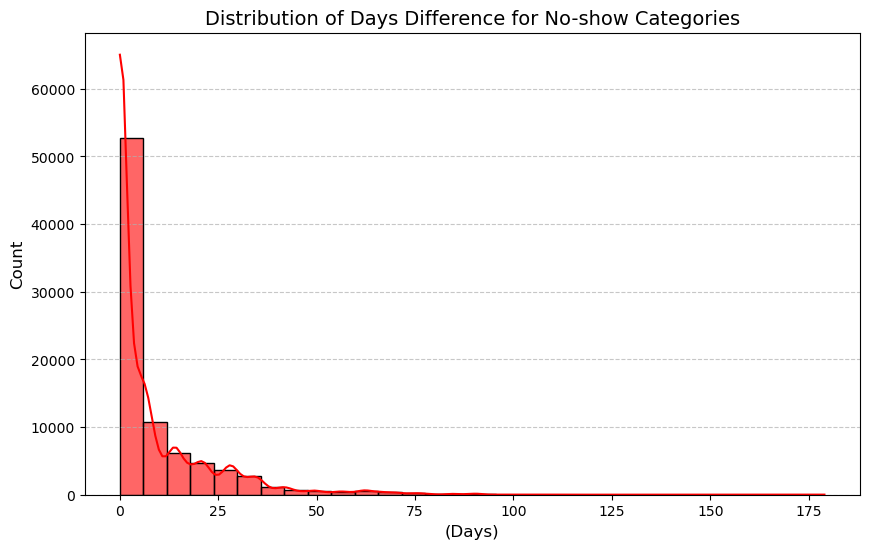

In [49]:
# Plot histograms for 'No-show = True'
plt.figure(figsize=(10, 6))
sns.histplot(data=data[data['No_Show']], x='DaysDifference', color='red', label='No-show = Missed', kde=True, bins=30, alpha=0.6)
plt.title('Distribution of Days Difference for No-show Categories', fontsize=14)
plt.xlabel('(Days)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



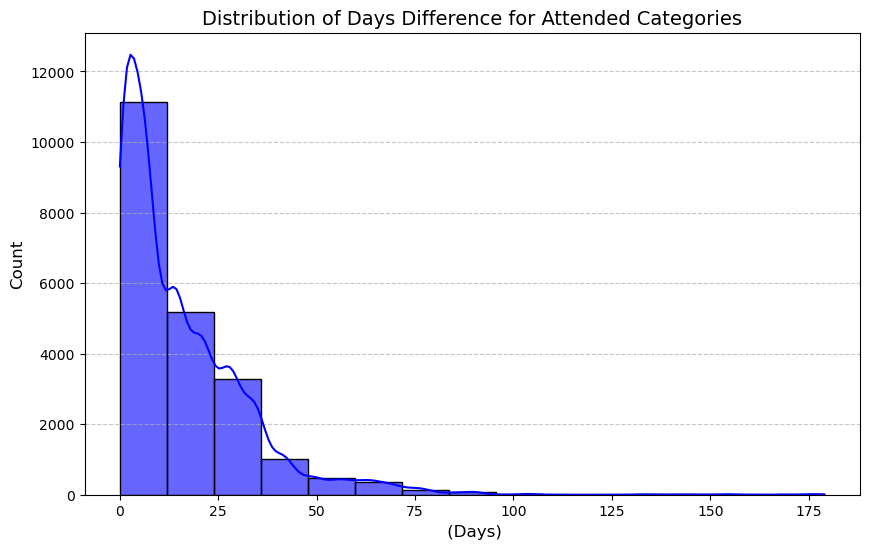

In [50]:
# No Show = False
plt.figure(figsize=(10, 6))
sns.histplot(data=data[~data['No_Show']], x='DaysDifference', color='blue', label='Attended', kde=True, bins=15, alpha=0.6)
plt.title('Distribution of Days Difference for Attended Categories', fontsize=14)
plt.xlabel(' (Days)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

5. Box Plot for Days Difference

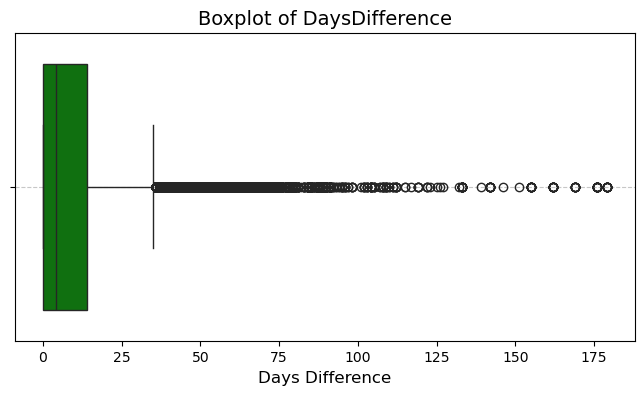

In [51]:

plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='DaysDifference', color='green')
plt.title('Boxplot of DaysDifference', fontsize=14)
plt.xlabel('Days Difference', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


Most of the days difference values are between 0 and 25 and Median is towards the 25th percentile indicating skewed distribution. Having numerous outliers extending far beyong the Q3 some as high as 175 days. This could mean in some unusual cases the appointments are given very far in advance.

Creating numeric Dataframe for multivariate analysis

In [52]:

numeric_df = ['Age', 'Gender', 'Scholarship', 'Hypertension', 'Diabetes', 
        'Alcoholism', 'Handicap', 'SMS_received', 'No_Show', 'DaysDifference'] 
corr_df = data[numeric_df]

print(corr_df.head())

   Age Gender  Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
0   62      F        False          True     False       False     False   
1   56      M        False         False     False       False     False   
2   62      F        False         False     False       False     False   
3    8      F        False         False     False       False     False   
4   56      F        False          True      True       False     False   

   SMS_received  No_Show  DaysDifference  
0         False     True               0  
1         False     True               0  
2         False     True               0  
3         False     True               0  
4         False     True               0  


Label encoding

In [53]:
corr_df['Gender'] = corr_df['Gender'].map({'F': 0, 'M': 1})
print(corr_df['Gender'].head())


0    0
1    1
2    0
3    0
4    0
Name: Gender, dtype: int64


4. Correlation Heatmap

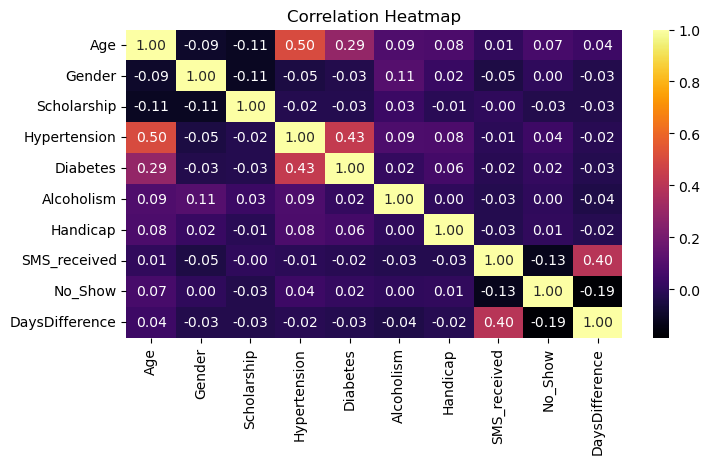

In [54]:
correlation_matrix = corr_df.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='inferno')
plt.title('Correlation Heatmap')
plt.show()

The correlation analysis reveals a notable relationship between Age and diabetes, as well as Age and hypertension, indicating a stronger association compared to other variable pairs. 

5. Days of week trend

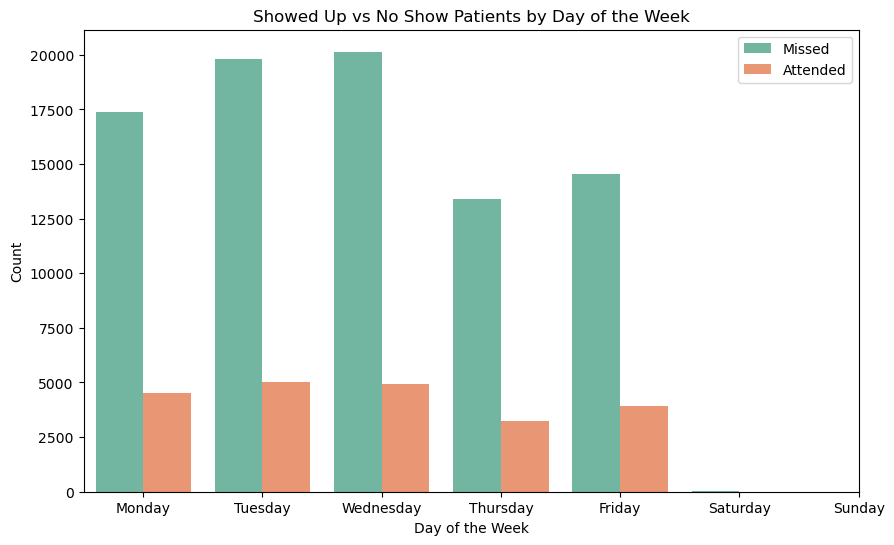

In [55]:
data['Weekday'] = data['AppointmentDay'].dt.dayofweek

plt.figure(figsize=(10, 6))
sns.countplot(x='Weekday', hue='No_Show',hue_order=[True, False], data=data, palette='Set2')
#sns.countplot(x='Weekday', hue='No_Show',data=data, palette='Set2')
plt.title('Showed Up vs No Show Patients by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(labels=['Missed', 'Attended'])
plt.show()

Almost all appointments are given on weekdays except very few cases. Mon to Wed has maximum appointments as compared to Thu and Fri

Checking if Dataset if imbalanced

In [56]:
target_distribution = data['No_Show'].value_counts(normalize=True)
target_distribution.value_counts(normalize=True)*100

proportion
0.797359    50.0
0.202641    50.0
Name: proportion, dtype: float64

Plot the Target Variable distribution

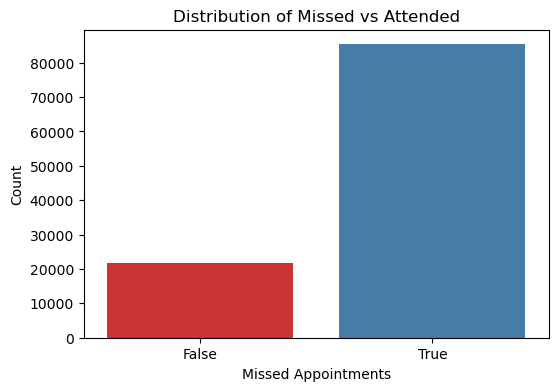

In [57]:
plt.figure(figsize=(6, 4))
sns.countplot(x='No_Show', data=data, palette='Set1')
plt.title('Distribution of Missed vs Attended')
plt.xlabel('Missed Appointments')
plt.ylabel('Count')
plt.show()

The dataset is imbalanced

Feature Selection

In [58]:
data['Gender'] = data['Gender'].map({'F': 0, 'M': 1})

In [59]:
data['Gender'].head(5)

0    0
1    1
2    0
3    0
4    0
Name: Gender, dtype: int64

In [60]:
# Features (X)
X = data[['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 
        'SMS_received', 'DaysDifference']]

# Target (y)
y = data['No_Show']

In [61]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Data Balancing

Oversampling using SMOTE

In [62]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts(normalize=True)

No_Show
True     0.5
False    0.5
Name: proportion, dtype: float64

Create models using Balanced data by SMOTE 

1. Logistic Regression

In [63]:
log_reg1 = LogisticRegression(random_state=42, max_iter=1000)
log_reg1.fit(X_train_smote, y_train_smote)

y_predLogReg1 = log_reg1.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_predLogReg1):.2f}")
print(classification_report(y_test, y_predLogReg1))

Accuracy: 0.65
              precision    recall  f1-score   support

       False       0.30      0.53      0.38      6524
        True       0.85      0.67      0.75     25573

    accuracy                           0.65     32097
   macro avg       0.57      0.60      0.57     32097
weighted avg       0.74      0.65      0.68     32097



2. Decision Tree

In [64]:
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_train_smote, y_train_smote)

y_pred_dt1 = dt1.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_dt1):.2f}")
print(classification_report(y_test, y_pred_dt1))

Accuracy: 0.65
              precision    recall  f1-score   support

       False       0.30      0.53      0.38      6524
        True       0.85      0.69      0.76     25573

    accuracy                           0.65     32097
   macro avg       0.57      0.61      0.57     32097
weighted avg       0.74      0.65      0.68     32097



3. Random Forest

In [65]:
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train_smote, y_train_smote)

y_pred_rf1 = rf1.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf1):.2f}")
print(classification_report(y_test, y_pred_rf1))

Accuracy: 0.67
              precision    recall  f1-score   support

       False       0.30      0.49      0.37      6524
        True       0.85      0.71      0.77     25573

    accuracy                           0.67     32097
   macro avg       0.57      0.60      0.57     32097
weighted avg       0.74      0.67      0.69     32097



4. XGBoost

In [66]:
xgb1 = XGBClassifier(random_state=42)
xgb1.fit(X_train_smote, y_train_smote)

y_pred_xgb1 = xgb1.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb1):.2f}")
print(classification_report(y_test, y_pred_xgb1))

Accuracy: 0.62
              precision    recall  f1-score   support

       False       0.31      0.69      0.42      6524
        True       0.88      0.60      0.71     25573

    accuracy                           0.62     32097
   macro avg       0.59      0.65      0.57     32097
weighted avg       0.77      0.62      0.65     32097



5. SVM

In [67]:
svm1 = SVC(kernel="rbf", random_state=42) 
svm1.fit(X_train_smote, y_train_smote) 

y_pred_svm = svm1.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.62
              precision    recall  f1-score   support

       False       0.31      0.70      0.43      6524
        True       0.89      0.60      0.72     25573

    accuracy                           0.62     32097
   macro avg       0.60      0.65      0.57     32097
weighted avg       0.77      0.62      0.66     32097



Performance metrics comparison

In [68]:
model_predictions = {
    "Logistic Regression": y_predLogReg1,
    "Decision Tree": y_pred_dt1,
    "Random Forest": y_pred_rf1,
    "XGBoost": y_pred_xgb1,
    "SVM":y_pred_svm
}

metrics_dict = {}

for model, y_pred in model_predictions.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics_dict[model] = {
        "Accuracy": np.mean(y_pred == y_test),
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    }

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_dict).T
print(metrics_df)


                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.646260   0.737444  0.646260  0.676837
Decision Tree        0.653519   0.738091  0.653519  0.682543
Random Forest        0.665358   0.735374  0.665358  0.690899
XGBoost              0.616911   0.766843  0.616911  0.654279
SVM                  0.620588   0.769187  0.620588  0.657587


Visualizing Result

Confusion Matrix

In [69]:
cm_logreg = confusion_matrix(y_test, y_predLogReg1)

print("Confusion Matrix for Logistic Regression:")
print(cm_logreg)

Confusion Matrix for Logistic Regression:
[[ 3484  3040]
 [ 8314 17259]]


Heatmaps for confusion matrix

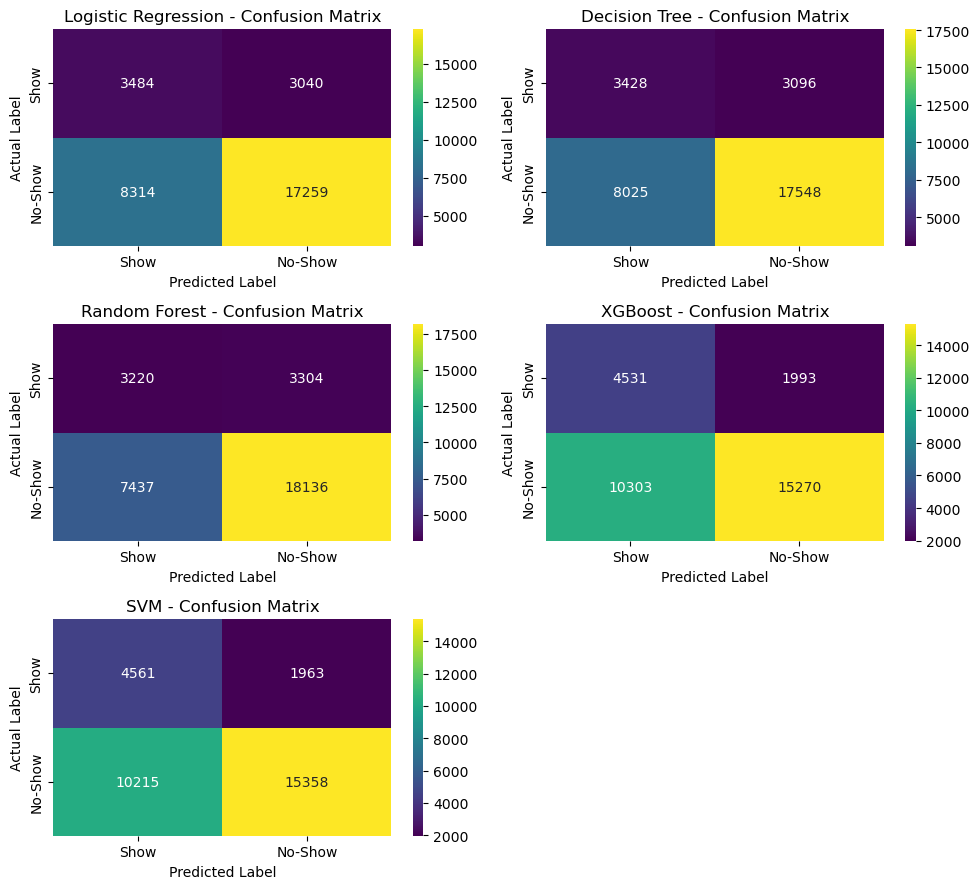

In [70]:
models_predictions = {
    "Logistic Regression": y_predLogReg1,
    "Decision Tree": y_pred_dt1,
    "Random Forest": y_pred_rf1,
    "XGBoost": y_pred_xgb1,
    "SVM":y_pred_svm
}

fig, axes = plt.subplots(3, 2, figsize=(10, 9))
axes = axes.flatten()

# Loop through each model's predictions 
for i, (name, y_pred) in enumerate(models_predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt = "d",cmap="viridis", xticklabels=[ "Show","No-Show"], yticklabels=["Show","No-Show"], ax=axes[i])
    # sns.heatmap(cm, annot=True, fmt="d",cmap="viridis",ax=axes[i])
    axes[i].set_title(f"{name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("Actual Label")
    
# Hide any extra empty subplots
for j in range(i + 1, len(axes)):  
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- XGBoost and SVM performed best at identifying (True Negatives) meaning correctly predicting higher number of patients who attended appointment.
- Random Forest predicted the maximum (True Positives) which means corrrectly predicting number of patients who actually missed appointments.
- Logistic Regression is the highly missclassifying False negatives.
- Decision Tree is slightly better than Logistic Regression but still not performing well.

Comparing performance metrics

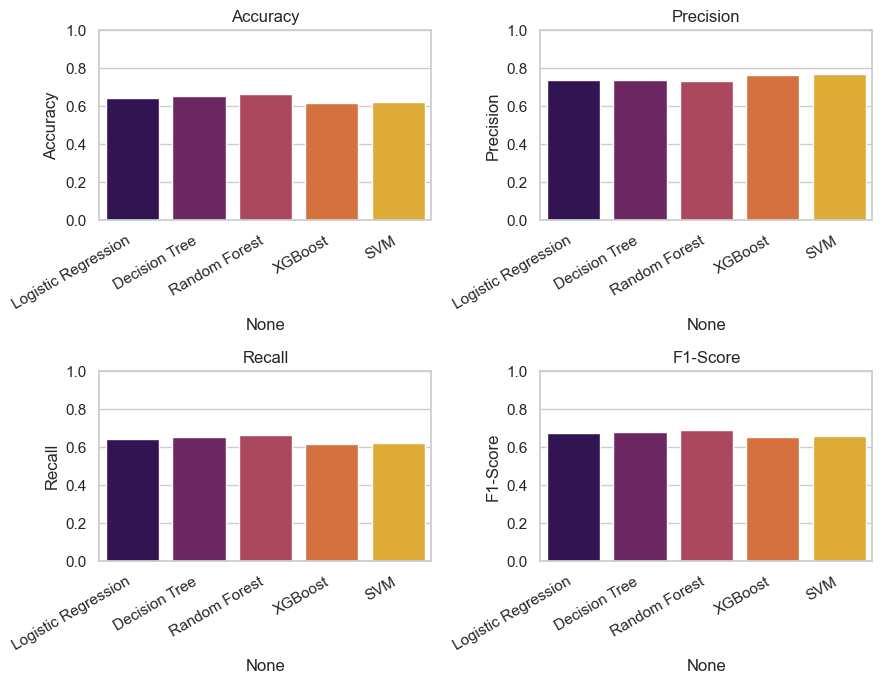

In [71]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(9, 7))  
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
axes = axes.flatten()
for i, metric in enumerate(metrics):
    sns.barplot(x=metrics_df.index, y=metrics_df[metric], ax=axes[i], palette="inferno")
    axes[i].set_title(metric)
    axes[i].set_ylim(0, 1)  
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30, ha="right")

plt.tight_layout()
plt.show()

- Precision: XGBoost giving highest precision, resulting fewer false positive predictions.
- Recall: Decision Tree and Random Forest have slightly better recall, which means they are capturing more True positive cases.
- F1-Score: Random Forest and Decision Tree have same F1 score.
- Accuracy: All models gave similar accuracy, but Random Forest shows slightly more accuracy.

So, Random forest is performng best in identifying maximum True Negatives in order to reduce the idle time caused by patient no-shows by using overbooking and reminder systems.

Hypertuning Best model - Random Forest with basic parameter tuning

In [72]:
rf_tuned = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

rf_tuned.fit(X_train_smote, y_train_smote)
y_pred_rf_tuned = rf_tuned.predict(X_test)

Performance comparison before and after tuning

In [73]:
print(classification_report(y_test, y_pred_rf1)) # Before Tuning
print(classification_report(y_test, y_pred_rf_tuned))  # Tuned 

              precision    recall  f1-score   support

       False       0.30      0.49      0.37      6524
        True       0.85      0.71      0.77     25573

    accuracy                           0.67     32097
   macro avg       0.57      0.60      0.57     32097
weighted avg       0.74      0.67      0.69     32097

              precision    recall  f1-score   support

       False       0.30      0.50      0.38      6524
        True       0.85      0.71      0.77     25573

    accuracy                           0.67     32097
   macro avg       0.57      0.60      0.57     32097
weighted avg       0.74      0.67      0.69     32097



After this tuning approach,  no change in results 

Hypertuning with Random search CV

In [ ]:
param_dist = {
    "n_estimators": [100, 200, 300, 400],  
    "max_depth": [10, 20, 30, None],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4],  
    "max_features": ["sqrt", "log2", None]
}
random_search = RandomizedSearchCV(rf1, param_distributions=param_dist,n_iter=10, scoring="f1_weighted", cv=3, verbose=0, n_jobs=-1, random_state=42)

random_search.fit(X_train_smote, y_train_smote)

best_rf = random_search.best_estimator_

y_pred_best_rf = best_rf.predict(X_test)

In [82]:
print("Tuned Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.2f}")
print(classification_report(y_test, y_pred_best_rf))

Tuned Model Performance:
Accuracy: 0.66
              precision    recall  f1-score   support

       False       0.31      0.55      0.39      6524
        True       0.86      0.69      0.76     25573

    accuracy                           0.66     32097
   macro avg       0.58      0.62      0.58     32097
weighted avg       0.74      0.66      0.69     32097



Using Grid SearchCV

In [75]:
param_grid = {
    "n_estimators": [best_rf.n_estimators - 50, best_rf.n_estimators, best_rf.n_estimators + 50],  
    "max_depth": [best_rf.max_depth - 5, best_rf.max_depth, best_rf.max_depth + 5],  
    "min_samples_split": [best_rf.min_samples_split - 1, best_rf.min_samples_split, best_rf.min_samples_split + 1],  
    "min_samples_leaf": [best_rf.min_samples_leaf - 1, best_rf.min_samples_leaf, best_rf.min_samples_leaf + 1]
}

grid_search = GridSearchCV(rf1, param_grid, cv=3, scoring="f1_weighted", verbose=0, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

best_rf_final = grid_search.best_estimator_

In [76]:
y_pred_final_rf = best_rf_final.predict(X_test)

In [83]:
print("Final Tuned Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final_rf):.2f}")
print(classification_report(y_test, y_pred_final_rf))

Final Tuned Model Performance:
Accuracy: 0.66
              precision    recall  f1-score   support

       False       0.30      0.50      0.38      6524
        True       0.85      0.71      0.77     25573

    accuracy                           0.66     32097
   macro avg       0.58      0.60      0.57     32097
weighted avg       0.74      0.66      0.69     32097



Comparing results of before tuning and after tuning with GridSearch CV

In [78]:
print(classification_report(y_test, y_pred_rf1)) # Before Tuning
print(classification_report(y_test, y_pred_final_rf))  # Tuned with GridSearchCV

              precision    recall  f1-score   support

       False       0.30      0.49      0.37      6524
        True       0.85      0.71      0.77     25573

    accuracy                           0.67     32097
   macro avg       0.57      0.60      0.57     32097
weighted avg       0.74      0.67      0.69     32097

              precision    recall  f1-score   support

       False       0.30      0.50      0.38      6524
        True       0.85      0.71      0.77     25573

    accuracy                           0.66     32097
   macro avg       0.58      0.60      0.57     32097
weighted avg       0.74      0.66      0.69     32097



Even hypertuning the parameters gave the same results 

Confusion Matrix

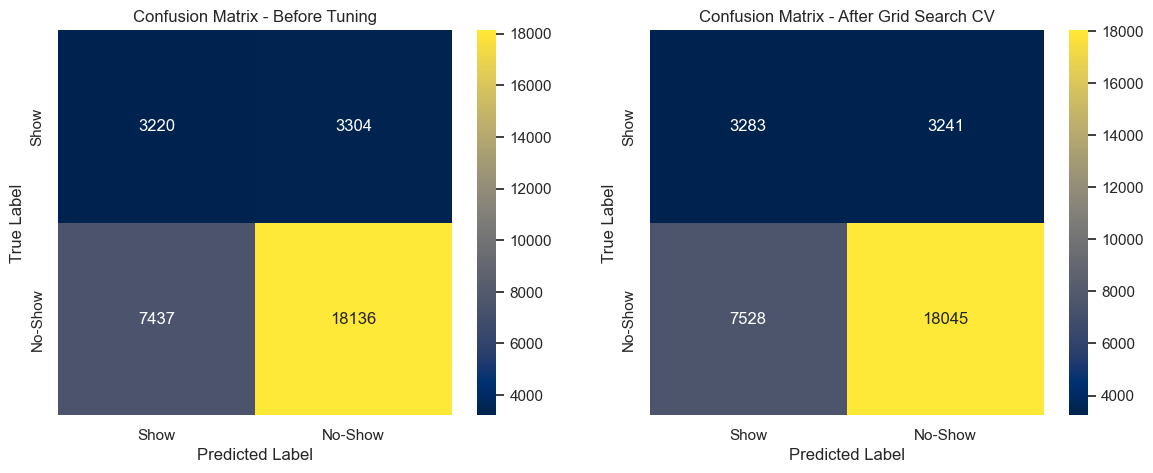

In [79]:
cm_before = confusion_matrix(y_test, y_pred_rf1)  # Before tuning
cm_afterGridCV = confusion_matrix(y_test, y_pred_final_rf)  # After tuning

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_before, annot=True, fmt="d", cmap="cividis", xticklabels=["Show", "No-Show"], 
            yticklabels=["Show", "No-Show"], ax=axes[0])
axes[0].set_title("Confusion Matrix - Before Tuning")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cm_afterGridCV, annot=True, fmt="d", cmap="cividis", xticklabels=["Show", "No-Show"], 
            yticklabels=["Show", "No-Show"], ax=axes[1])
axes[1].set_title("Confusion Matrix - After Grid Search CV")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()

After hyperparameter tuning with cross-validation, the results remained consistent, showing no significant improvement over the initial model. This suggests the model(Random Forest) is already well-optimised, and further adjustments are unlikely to enhance performance.

Saving best model to utilize further to make predictions

In [90]:
joblib.dump(best_rf_final, 'random_forest.pkl')

['random_forest.pkl']

In [ ]:
!pip freeze > requirements.txt